# The Growth of Global Obesity; Infograhpic

$\color{grey}{\text{13/05/2021 - Ward Ali Dib}}$

This report will use the code and data from assignmnet 2 to create an infographic using the matplotlib function GridSpec.

### Reading and cleaning the datasets:

In [1]:
# Import libraries needed.
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly_express as px

# Assign plotting style.
plt.style.use('seaborn')

In [2]:
# Import all data files downloaded.

gdp = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 2/Datasets/GDP.csv')
obesity = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 2/Datasets/obesity.csv')
obesity_region = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 2/Datasets/obesity-region.csv')

In [3]:
# Checking for missing values in the obesity dataset.

obesity.isna().any()

Unnamed: 0     True
2016          False
2016.1        False
2016.2        False
2015          False
              ...  
1976.1        False
1976.2        False
1975          False
1975.1        False
1975.2        False
Length: 127, dtype: bool

In [4]:
# No missing values. However, upon inspecting the data manually, it does not look clean so we will clean.
# There are countries with no entries, so we will remove the rows with "No data" and proceed to clean the dataset. 

missing_values = ["No data"]
obesity = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 2/Datasets/obesity.csv',
                      header = [0,1], skiprows = [1,2], index_col = 0, na_values = missing_values)
obesity.isnull().values.any()

# Drop all rows with "No data" values.

obesity.dropna(axis = 0, inplace = True)

obesity.head()

2016                                      \
Country            Both sexes              Male            Female   
Afghanistan     5.5 [3.4-8.1]     3.2 [1.3-6.4]    7.6 [4.3-12.4]   
Albania      21.7 [17.0-26.7]  21.6 [14.8-29.0]  21.8 [15.3-28.9]   
Algeria      27.4 [22.5-32.7]  19.9 [13.6-27.1]  34.9 [27.6-42.7]   
Andorra      25.6 [20.1-31.3]  25.9 [18.0-34.3]  25.3 [17.7-33.7]   
Angola         8.2 [5.1-12.2]     4.0 [1.6-7.9]   12.1 [6.8-19.0]   

                         2015                                      \
Country            Both sexes              Male            Female   
Afghanistan     5.2 [3.3-7.7]     3.0 [1.3-6.0]    7.3 [4.1-11.8]   
Albania      21.1 [16.6-26.0]  20.9 [14.4-28.1]  21.3 [15.1-28.1]   
Algeria      26.7 [21.9-31.8]  19.2 [13.2-26.1]  34.2 [27.1-41.7]   
Andorra      25.4 [20.1-31.0]  25.5 [17.8-33.8]  25.2 [17.7-33.4]   
Angola         7.9 [4.9-11.7]     3.8 [1.5-7.3]   11.6 [6.5-18.2]   

                         2014                                      \
Country            Both sexes              Male            Female   
Afghanistan     4.9 [3.1-7.3]     2.8 [1.2-5.6]    7.0 [4.0-11.3]   
Albania      20.5 [16.2-25.1]  20.2 [13.9-27.3]  20.8 [14.9-27.4]   
Algeria      26.0 [21.4-30.9]  18.5 [12.7-25.0]  33.6 [26.7-40.7]   
Andorra      25.2 [20.0-30.7]  25.2 [17.6-33.3]  25.1 [17.8-33.1]   
Angola         7.5 [4.7-11.2]     3.6 [1.4-6.9]   11.1 [6.2-17.5]   

                         2013  ...              1978             1977  \
Country            Both sexes  ...            Female       Both sexes   
Afghanistan     4.7 [2.9-6.9]  ...     0.9 [0.3-2.2]    0.6 [0.2-1.2]   
Albania      19.9 [15.7-24.4]  ...    9.1 [4.6-15.5]   6.8 [4.0-10.7]   
Algeria      25.3 [20.9-30.1]  ...   11.8 [6.5-18.6]   7.4 [4.3-11.3]   
Andorra      25.0 [20.0-30.3]  ...  17.5 [10.9-25.3]  14.0 [9.6-19.1]   
Angola         7.1 [4.4-10.6]  ...     1.6 [0.5-3.7]    0.9 [0.3-2.0]   

                                                           1976  \
Country                 Male            Female       Both sexes   
Afghanistan    0.2 [0.0-0.7]     0.9 [0.3-2.1]    0.5 [0.2-1.1]   
Albania        4.8 [2.0-9.3]    8.9 [4.3-15.4]   6.7 [3.8-10.6]   
Algeria        3.1 [1.2-6.2]   11.4 [6.2-18.4]   7.2 [4.1-11.1]   
Andorra      10.7 [5.6-17.4]  16.9 [10.4-24.8]  13.5 [9.1-18.6]   
Angola         0.3 [0.0-0.9]     1.5 [0.4-3.6]    0.9 [0.3-2.0]   

                                                          1975  \
Country                 Male           Female       Both sexes   
Afghanistan    0.2 [0.0-0.7]    0.8 [0.2-2.0]    0.5 [0.2-1.1]   
Albania        4.6 [1.8-9.2]   8.8 [4.1-15.4]   6.5 [3.6-10.5]   
Algeria        2.9 [1.1-6.1]  11.1 [5.8-18.2]   6.9 [3.9-10.9]   
Andorra      10.2 [5.2-16.9]  16.4 [9.8-24.4]  12.9 [8.6-18.1]   
Angola         0.3 [0.0-0.9]    1.4 [0.4-3.5]    0.8 [0.3-1.9]   

                                              
Country                Male           Female  
Afghanistan   0.2 [0.0-0.6]    0.8 [0.2-2.0]  
Albania       4.4 [1.7-9.2]   8.6 [3.9-15.4]  
Algeria       2.8 [1.0-6.0]  10.7 [5.5-18.0]  
Andorra      9.7 [4.7-16.3]  15.8 [9.2-23.9]  
Angola        0.2 [0.0-0.8]    1.4 [0.4-3.4]  

[5 rows x 126 columns]

In [5]:
# Now we clean the data and set the index to 'Country'. 

obesity.columns.names = ['Year', 'Sex']
obesity.index.names = ['Country']
obesity.columns.names
obesity.index.names

FrozenList(['Country'])

In [6]:
obesity = obesity.stack(level=0)
obesity

Sex                     Both sexes            Female           Male
Country     Year                                                   
Afghanistan 1975     0.5 [0.2-1.1]     0.8 [0.2-2.0]  0.2 [0.0-0.6]
            1976     0.5 [0.2-1.1]     0.8 [0.2-2.0]  0.2 [0.0-0.7]
            1977     0.6 [0.2-1.2]     0.9 [0.3-2.1]  0.2 [0.0-0.7]
            1978     0.6 [0.2-1.3]     0.9 [0.3-2.2]  0.2 [0.1-0.7]
            1979     0.6 [0.3-1.3]     1.0 [0.3-2.3]  0.3 [0.1-0.8]
...                            ...               ...            ...
Zimbabwe    2012  14.3 [11.4-17.6]  23.5 [18.3-29.3]  4.0 [2.2-6.6]
            2013  14.6 [11.5-18.0]  23.9 [18.5-30.0]  4.2 [2.3-6.9]
            2014  14.9 [11.7-18.4]  24.4 [18.8-30.6]  4.4 [2.4-7.3]
            2015  15.2 [11.9-18.8]  24.8 [18.9-31.3]  4.5 [2.4-7.6]
            2016  15.5 [12.0-19.2]  25.3 [19.1-32.0]  4.7 [2.5-8.0]

[8022 rows x 3 columns]

In [7]:
obesity = obesity.reset_index()
obesity

Sex,Country,Year,Both sexes,Female,Male
0,Afghanistan,1975,0.5 [0.2-1.1],0.8 [0.2-2.0],0.2 [0.0-0.6]
1,Afghanistan,1976,0.5 [0.2-1.1],0.8 [0.2-2.0],0.2 [0.0-0.7]
2,Afghanistan,1977,0.6 [0.2-1.2],0.9 [0.3-2.1],0.2 [0.0-0.7]
3,Afghanistan,1978,0.6 [0.2-1.3],0.9 [0.3-2.2],0.2 [0.1-0.7]
4,Afghanistan,1979,0.6 [0.3-1.3],1.0 [0.3-2.3],0.3 [0.1-0.8]
...,...,...,...,...,...
8017,Zimbabwe,2012,14.3 [11.4-17.6],23.5 [18.3-29.3],4.0 [2.2-6.6]
8018,Zimbabwe,2013,14.6 [11.5-18.0],23.9 [18.5-30.0],4.2 [2.3-6.9]
8019,Zimbabwe,2014,14.9 [11.7-18.4],24.4 [18.8-30.6],4.4 [2.4-7.3]
8020,Zimbabwe,2015,15.2 [11.9-18.8],24.8 [18.9-31.3],4.5 [2.4-7.6]


In [8]:
# The numbers in the brackets represent the standardised age groups of the obese people.
# In this report, we are not interested in the age statistics so we will drop those entries from the dataset. 

obesity['Standardised age estimate'] = obesity['Both sexes'].apply(lambda x:x.split()[1])
obesity['Both sexes'] = obesity['Both sexes'].apply(lambda x:x.split()[0])

obesity['Standardised age estimate'] = obesity['Male'].apply(lambda x:x.split()[1])
obesity['Male'] = obesity['Male'].apply(lambda x:x.split()[0])

obesity['Standardised age estimate'] = obesity['Female'].apply(lambda x:x.split()[1])
obesity['Female'] = obesity['Female'].apply(lambda x:x.split()[0])

obesity.drop(['Standardised age estimate'], axis = 1, inplace = True)

obesity

Sex,Country,Year,Both sexes,Female,Male
0,Afghanistan,1975,0.5,0.8,0.2
1,Afghanistan,1976,0.5,0.8,0.2
2,Afghanistan,1977,0.6,0.9,0.2
3,Afghanistan,1978,0.6,0.9,0.2
4,Afghanistan,1979,0.6,1.0,0.3
...,...,...,...,...,...
8017,Zimbabwe,2012,14.3,23.5,4.0
8018,Zimbabwe,2013,14.6,23.9,4.2
8019,Zimbabwe,2014,14.9,24.4,4.4
8020,Zimbabwe,2015,15.2,24.8,4.5


In [9]:
# For the analysis, we need to pivot around 1 sex at a time. So we will melt the Obesity dataframe then split it.

obesity = obesity.melt(id_vars = ['Country', 'Year'], value_vars = ['Both sexes', 'Female', 'Male'],
                       value_name = 'Obesity %')
obesity 

,Country,Year,Sex,Obesity %
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1976,Both sexes,0.5
2,Afghanistan,1977,Both sexes,0.6
3,Afghanistan,1978,Both sexes,0.6
4,Afghanistan,1979,Both sexes,0.6
...,...,...,...,...
24061,Zimbabwe,2012,Male,4.0
24062,Zimbabwe,2013,Male,4.2
24063,Zimbabwe,2014,Male,4.4
24064,Zimbabwe,2015,Male,4.5


In [10]:
# Now we will generate seperate dataframes for each sex.

obesity_male = obesity.loc[obesity.Sex == 'Male', :].reset_index(drop = True)
obesity_male_pivot = obesity_male[['Country', 'Year', 'Obesity %']].pivot(index = 'Country',
                                                                          columns ='Year', values = 'Obesity %')

obesity_female = obesity.loc[obesity.Sex == 'Female', :].reset_index(drop = True)
obesity_female_pivot = obesity_female[['Country', 'Year', 'Obesity %']].pivot(index = 'Country',
                                                                              columns = 'Year', values = 'Obesity %')

obesity_both = obesity.loc[obesity.Sex == 'Both sexes', :].reset_index(drop = True)
obesity_both_pivot = obesity_both[['Country', 'Year', 'Obesity %']].pivot(index = 'Country',
                                                                          columns = 'Year', values = 'Obesity %')

obesity_both.head()

,Country,Year,Sex,Obesity %
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1976,Both sexes,0.5
2,Afghanistan,1977,Both sexes,0.6
3,Afghanistan,1978,Both sexes,0.6
4,Afghanistan,1979,Both sexes,0.6


Now that the obesity dataset is clean, we will clean proceed to cleaning and melting the two other datasets before performing any analysis.

In [11]:
gdp.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160,NaN


In [12]:
# Melting the years.

# Transform
year_cols = [str(x) for x in list(range(1975, 2017))]
gdp_df = pd.melt(gdp, id_vars = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = year_cols)
gdp_df.rename(columns = {'variable':'Year'}, inplace = True) 
gdp_df.rename(columns = {'value':'GDP'}, inplace = True) 
gdp_df.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis = 1, inplace = True)
gdp_df.sort_values(by=['Country', 'Year'])
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'])
gdp_df = gdp_df[gdp_df['Year'] >= 1975]

gdp_df.head

<bound method NDFrame.head of             Country  Year          GDP
0             Aruba  1975          NaN
1       Afghanistan  1975   186.510897
2            Angola  1975          NaN
3           Albania  1975          NaN
4           Andorra  1975  7169.101006
...             ...   ...          ...
11083        Kosovo  2016  3780.003689
11084   Yemen, Rep.  2016  1138.682995
11085  South Africa  2016  5272.918425
11086        Zambia  2016  1280.578447
11087      Zimbabwe  2016  1464.583529

[11088 rows x 3 columns]>

In [13]:
gdp_df = gdp_df.sort_values(by = ['Country', 'Year'])
gdp_df

,Country,Year,GDP
1,Afghanistan,1975,186.510897
265,Afghanistan,1976,197.445508
529,Afghanistan,1977,224.224797
793,Afghanistan,1978,247.354106
1057,Afghanistan,1979,275.738198
...,...,...,...
10031,Zimbabwe,2012,1304.969802
10295,Zimbabwe,2013,1430.000818
10559,Zimbabwe,2014,1434.899340
10823,Zimbabwe,2015,1445.071062


In [14]:
# For later analysis, we will merge the GDP and Obesity dataframes.

inner_merged_total = pd.merge(obesity, gdp_df, on = ["Country"])
inner_merged_total.head()
inner_joined_total = obesity.join(
    gdp_df.set_index(["Country"]),
    lsuffix = "_x",
    rsuffix = "_y",
    on = ["Country"],
)
inner_joined_total

,Country,Year_x,Sex,Obesity %,Year_y,GDP
0,Afghanistan,1975,Both sexes,0.5,1975.0,186.510897
0,Afghanistan,1975,Both sexes,0.5,1976.0,197.445508
0,Afghanistan,1975,Both sexes,0.5,1977.0,224.224797
0,Afghanistan,1975,Both sexes,0.5,1978.0,247.354106
0,Afghanistan,1975,Both sexes,0.5,1979.0,275.738198
...,...,...,...,...,...,...
24065,Zimbabwe,2016,Male,4.7,2012.0,1304.969802
24065,Zimbabwe,2016,Male,4.7,2013.0,1430.000818
24065,Zimbabwe,2016,Male,4.7,2014.0,1434.899340
24065,Zimbabwe,2016,Male,4.7,2015.0,1445.071062


In [15]:
inner_joined_total.set_index(['Country'], inplace = True)
inner_joined_total.sort_index(inplace = True)
inner_joined_total

,Year_x,Sex,Obesity %,Year_y,GDP
Country,,,,,
Afghanistan,1975,Both sexes,0.5,1975.0,186.510897
Afghanistan,2003,Male,1.4,1981.0,264.111317
Afghanistan,2003,Male,1.4,1980.0,272.655286
Afghanistan,2003,Male,1.4,1979.0,275.738198
Afghanistan,2003,Male,1.4,1978.0,247.354106
...,...,...,...,...,...
Zimbabwe,2003,Both sexes,11.5,1980.0,901.499145
Zimbabwe,2003,Both sexes,11.5,1981.0,1043.746833
Zimbabwe,2003,Both sexes,11.5,1982.0,1073.063847


In [16]:
# Now we will clean the 'Obesity per region' dataset.

obesity_region.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,WHO region,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Global,13.2 [12.5-13.9],11.1 [10.2-12.2],15.3 [14.2-16.4],12.8 [12.2-13.5],10.7 [9.9-11.7],14.9 [13.9-15.9],12.4 [11.8-13.0],10.3 [9.6-11.2],14.5 [13.6-15.4],...,6.3 [5.3-7.4],4.5 [3.9-5.2],2.9 [2.3-3.6],6.2 [5.2-7.3],4.4 [3.8-5.1],2.8 [2.2-3.5],6.1 [5.0-7.2],4.3 [3.7-5.0],2.7 [2.1-3.4],5.9 [4.8-7.2]
4,Africa,9.1 [8.2-10.0],4.8 [3.9-5.9],13.2 [11.8-14.8],8.8 [8.0-9.6],4.6 [3.8-5.6],12.9 [11.5-14.3],8.5 [7.7-9.3],4.4 [3.6-5.3],12.5 [11.2-13.8],...,3.2 [2.2-4.4],1.9 [1.3-2.5],0.6 [0.3-1.1],3.1 [2.1-4.4],1.8 [1.2-2.5],0.5 [0.3-1.0],3.0 [2.0-4.3],1.7 [1.2-2.4],0.5 [0.2-1.0],2.9 [1.9-4.2]


In [17]:
obesity_region.isna().any()

Unnamed: 0     True
2016          False
2016.1        False
2016.2        False
2015          False
              ...  
1976.1        False
1976.2        False
1975          False
1975.1        False
1975.2        False
Length: 127, dtype: bool

In [18]:
missing_values = ["No data"]
obesity_region = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 2/Datasets/obesity-region.csv',
                             header = [0,1], skiprows = [1,2], index_col = 0, na_values = missing_values)
obesity_region

2016                                      \
WHO region                   Both sexes              Male            Female   
Global                 13.2 [12.5-13.9]  11.1 [10.2-12.2]  15.3 [14.2-16.4]   
Africa                   9.1 [8.2-10.0]     4.8 [3.9-5.9]  13.2 [11.8-14.8]   
Americas               29.0 [27.1-31.0]  26.2 [23.4-29.1]  31.7 [28.8-34.4]   
South-East Asia           4.6 [3.8-5.5]     3.2 [2.4-4.3]     6.0 [4.8-7.5]   
Europe                 25.3 [23.6-27.0]  23.4 [21.1-25.6]  27.1 [24.7-29.5]   
Eastern Mediterranean  19.5 [17.8-21.2]  14.9 [12.7-17.2]  24.3 [21.8-26.9]   
Western Pacific           6.7 [5.5-8.1]     6.3 [4.6-8.4]     7.2 [5.5-9.3]   

                                   2015                                      \
WHO region                   Both sexes              Male            Female   
Global                 12.8 [12.2-13.5]   10.7 [9.9-11.7]  14.9 [13.9-15.9]   
Africa                    8.8 [8.0-9.6]     4.6 [3.8-5.6]  12.9 [11.5-14.3]   
Americas               28.4 [26.6-30.3]  25.6 [23.0-28.3]  31.1 [28.5-33.7]   
South-East Asia           4.3 [3.6-5.1]     3.0 [2.3-4.0]     5.7 [4.6-7.0]   
Europe                 24.8 [23.2-26.3]  22.7 [20.6-24.8]  26.6 [24.4-28.9]   
Eastern Mediterranean  18.9 [17.4-20.5]  14.3 [12.3-16.4]  23.7 [21.3-26.1]   
Western Pacific           6.4 [5.3-7.6]     5.9 [4.4-7.7]     6.9 [5.3-8.7]   

                                   2014                                      \
WHO region                   Both sexes              Male            Female   
Global                 12.4 [11.8-13.0]   10.3 [9.6-11.2]  14.5 [13.6-15.4]   
Africa                    8.5 [7.7-9.3]     4.4 [3.6-5.3]  12.5 [11.2-13.8]   
Americas               27.8 [26.1-29.6]  25.0 [22.6-27.5]  30.5 [28.1-32.9]   
South-East Asia           4.1 [3.5-4.8]     2.8 [2.2-3.7]     5.4 [4.4-6.6]   
Europe                 24.2 [22.8-25.7]  22.1 [20.2-24.1]  26.2 [24.1-28.3]   
Eastern Mediterranean  18.2 [16.8-19.7]  13.8 [11.9-15.6]  23.1 [20.9-25.3]   
Western Pacific           6.0 [5.0-7.1]     5.5 [4.2-7.1]     6.5 [5.2-8.2]   

                                   2013  ...              1978  \
WHO region                   Both sexes  ...            Female   
Global                 12.1 [11.5-12.6]  ...     6.3 [5.3-7.4]   
Africa                    8.2 [7.5-8.9]  ...     3.2 [2.2-4.4]   
Americas               27.3 [25.7-28.8]  ...   11.9 [9.6-14.5]   
South-East Asia           3.9 [3.3-4.5]  ...     0.7 [0.4-1.1]   
Europe                 23.7 [22.4-25.1]  ...  14.5 [11.8-17.6]   
Eastern Mediterranean  17.6 [16.3-19.0]  ...    8.7 [6.1-11.9]   
Western Pacific           5.7 [4.8-6.7]  ...     1.1 [0.8-1.6]   

                                  1977                                   \
WHO region                  Both sexes           Male            Female   
Global                   4.5 [3.9-5.2]  2.9 [2.3-3.6]     6.2 [5.2-7.3]   
Africa                   1.9 [1.3-2.5]  0.6 [0.3-1.1]     3.1 [2.1-4.4]   
Americas                9.5 [8.0-11.2]  7.4 [5.5-9.6]   11.6 [9.2-14.2]   
South-East Asia          0.4 [0.2-0.6]  0.2 [0.1-0.4]     0.6 [0.3-1.1]   
Europe                 10.8 [9.1-12.7]  6.8 [5.3-8.7]  14.3 [11.4-17.4]   
Eastern Mediterranean    5.5 [4.1-7.2]  2.7 [1.6-4.2]    8.5 [5.8-11.7]   
Western Pacific          0.8 [0.6-1.0]  0.5 [0.3-0.7]     1.1 [0.7-1.6]   

                                  1976                                   \
WHO region                  Both sexes           Male            Female   
Global                   4.4 [3.8-5.1]  2.8 [2.2-3.5]     6.1 [5.0-7.2]   
Africa                   1.8 [1.2-2.5]  0.5 [0.3-1.0]     3.0 [2.0-4.3]   
Americas                9.3 [7.7-11.0]  7.2 [5.2-9.4]   11.3 [8.9-14.0]   
South-East Asia          0.4 [0.2-0.6]  0.2 [0.1-0.4]     0.6 [0.3-1.0]   
Europe                 10.5 [8.8-12.5]  6.6 [5.0-8.5]  14.0 [11.1-17.3]   
Eastern Mediterranean    5.3 [3.8-7.1]  2.6 [1.5-4.1]    8.2 [5.5-11.6]   
Western Pacific          0.7

In [19]:
obesity_region.isnull().values.any()

False

In [20]:
obesity_region.dropna(axis = 0,inplace = True)

In [21]:
obesity_region

2016                                      \
WHO region                   Both sexes              Male            Female   
Global                 13.2 [12.5-13.9]  11.1 [10.2-12.2]  15.3 [14.2-16.4]   
Africa                   9.1 [8.2-10.0]     4.8 [3.9-5.9]  13.2 [11.8-14.8]   
Americas               29.0 [27.1-31.0]  26.2 [23.4-29.1]  31.7 [28.8-34.4]   
South-East Asia           4.6 [3.8-5.5]     3.2 [2.4-4.3]     6.0 [4.8-7.5]   
Europe                 25.3 [23.6-27.0]  23.4 [21.1-25.6]  27.1 [24.7-29.5]   
Eastern Mediterranean  19.5 [17.8-21.2]  14.9 [12.7-17.2]  24.3 [21.8-26.9]   
Western Pacific           6.7 [5.5-8.1]     6.3 [4.6-8.4]     7.2 [5.5-9.3]   

                                   2015                                      \
WHO region                   Both sexes              Male            Female   
Global                 12.8 [12.2-13.5]   10.7 [9.9-11.7]  14.9 [13.9-15.9]   
Africa                    8.8 [8.0-9.6]     4.6 [3.8-5.6]  12.9 [11.5-14.3]   
Americas               28.4 [26.6-30.3]  25.6 [23.0-28.3]  31.1 [28.5-33.7]   
South-East Asia           4.3 [3.6-5.1]     3.0 [2.3-4.0]     5.7 [4.6-7.0]   
Europe                 24.8 [23.2-26.3]  22.7 [20.6-24.8]  26.6 [24.4-28.9]   
Eastern Mediterranean  18.9 [17.4-20.5]  14.3 [12.3-16.4]  23.7 [21.3-26.1]   
Western Pacific           6.4 [5.3-7.6]     5.9 [4.4-7.7]     6.9 [5.3-8.7]   

                                   2014                                      \
WHO region                   Both sexes              Male            Female   
Global                 12.4 [11.8-13.0]   10.3 [9.6-11.2]  14.5 [13.6-15.4]   
Africa                    8.5 [7.7-9.3]     4.4 [3.6-5.3]  12.5 [11.2-13.8]   
Americas               27.8 [26.1-29.6]  25.0 [22.6-27.5]  30.5 [28.1-32.9]   
South-East Asia           4.1 [3.5-4.8]     2.8 [2.2-3.7]     5.4 [4.4-6.6]   
Europe                 24.2 [22.8-25.7]  22.1 [20.2-24.1]  26.2 [24.1-28.3]   
Eastern Mediterranean  18.2 [16.8-19.7]  13.8 [11.9-15.6]  23.1 [20.9-25.3]   
Western Pacific           6.0 [5.0-7.1]     5.5 [4.2-7.1]     6.5 [5.2-8.2]   

                                   2013  ...              1978  \
WHO region                   Both sexes  ...            Female   
Global                 12.1 [11.5-12.6]  ...     6.3 [5.3-7.4]   
Africa                    8.2 [7.5-8.9]  ...     3.2 [2.2-4.4]   
Americas               27.3 [25.7-28.8]  ...   11.9 [9.6-14.5]   
South-East Asia           3.9 [3.3-4.5]  ...     0.7 [0.4-1.1]   
Europe                 23.7 [22.4-25.1]  ...  14.5 [11.8-17.6]   
Eastern Mediterranean  17.6 [16.3-19.0]  ...    8.7 [6.1-11.9]   
Western Pacific           5.7 [4.8-6.7]  ...     1.1 [0.8-1.6]   

                                  1977                                   \
WHO region                  Both sexes           Male            Female   
Global                   4.5 [3.9-5.2]  2.9 [2.3-3.6]     6.2 [5.2-7.3]   
Africa                   1.9 [1.3-2.5]  0.6 [0.3-1.1]     3.1 [2.1-4.4]   
Americas                9.5 [8.0-11.2]  7.4 [5.5-9.6]   11.6 [9.2-14.2]   
South-East Asia          0.4 [0.2-0.6]  0.2 [0.1-0.4]     0.6 [0.3-1.1]   
Europe                 10.8 [9.1-12.7]  6.8 [5.3-8.7]  14.3 [11.4-17.4]   
Eastern Mediterranean    5.5 [4.1-7.2]  2.7 [1.6-4.2]    8.5 [5.8-11.7]   
Western Pacific          0.8 [0.6-1.0]  0.5 [0.3-0.7]     1.1 [0.7-1.6]   

                                  1976                                   \
WHO region                  Both sexes           Male            Female   
Global                   4.4 [3.8-5.1]  2.8 [2.2-3.5]     6.1 [5.0-7.2]   
Africa                   1.8 [1.2-2.5]  0.5 [0.3-1.0]     3.0 [2.0-4.3]   
Americas                9.3 [7.7-11.0]  7.2 [5.2-9.4]   11.3 [8.9-14.0]   
South-East Asia          0.4 [0.2-0.6]  0.2 [0.1-0.4]     0.6 [0.3-1.0]   
Europe                 10.5 [8.8-12.5]  6.6 [5.0-8.5]  14.0 [11.1-17.3]   
Eastern Mediterranean    5.3 [3.8-7.1]  2.6 [1.5-4.1]    8.2 [5.5-11.6]   
Western Pacific          0.7

In [22]:
obesity_region.columns.names = ['Year', 'Sex']
obesity_region.index.names = ['WHO region']
obesity_region.columns.names
obesity_region.index.names

FrozenList(['WHO region'])

In [23]:
obesity_region = obesity_region.stack(level=0)
obesity_region = obesity_region.reset_index()
obesity_region

Sex,WHO region,Year,Both sexes,Female,Male
0,Global,1975,4.3 [3.7-5.0],5.9 [4.8-7.2],2.7 [2.1-3.4]
1,Global,1976,4.4 [3.8-5.1],6.1 [5.0-7.2],2.8 [2.2-3.5]
2,Global,1977,4.5 [3.9-5.2],6.2 [5.2-7.3],2.9 [2.3-3.6]
3,Global,1978,4.6 [4.1-5.3],6.3 [5.3-7.4],3.0 [2.4-3.6]
4,Global,1979,4.8 [4.2-5.4],6.4 [5.5-7.5],3.1 [2.5-3.7]
...,...,...,...,...,...
289,Western Pacific,2012,5.3 [4.6-6.2],5.9 [4.8-7.2],4.8 [3.8-6.1]
290,Western Pacific,2013,5.7 [4.8-6.7],6.2 [5.0-7.7],5.1 [4.0-6.6]
291,Western Pacific,2014,6.0 [5.0-7.1],6.5 [5.2-8.2],5.5 [4.2-7.1]
292,Western Pacific,2015,6.4 [5.3-7.6],6.9 [5.3-8.7],5.9 [4.4-7.7]


In [24]:
# We will also get rid of the age column as with above.

obesity_region['Standardised age estimate'] = obesity_region['Both sexes'].apply(lambda x:x.split()[1])
obesity_region['Both sexes'] = obesity_region['Both sexes'].apply(lambda x:x.split()[0])

obesity_region['Standardised age estimate'] = obesity_region['Male'].apply(lambda x:x.split()[1])
obesity_region['Male'] = obesity_region['Male'].apply(lambda x:x.split()[0])

obesity_region['Standardised age estimate'] = obesity_region['Female'].apply(lambda x:x.split()[1])
obesity_region['Female'] = obesity_region['Female'].apply(lambda x:x.split()[0])

In [25]:
obesity_region = obesity_region.sort_values(by=['WHO region', 'Year'])
obesity_region

Sex,WHO region,Year,Both sexes,Female,Male,Standardised age estimate
42,Africa,1975,1.7,2.9,0.5,[1.9-4.2]
43,Africa,1976,1.8,3.0,0.5,[2.0-4.3]
44,Africa,1977,1.9,3.1,0.6,[2.1-4.4]
45,Africa,1978,1.9,3.2,0.6,[2.2-4.4]
46,Africa,1979,2.0,3.3,0.6,[2.4-4.5]
...,...,...,...,...,...,...
289,Western Pacific,2012,5.3,5.9,4.8,[4.8-7.2]
290,Western Pacific,2013,5.7,6.2,5.1,[5.0-7.7]
291,Western Pacific,2014,6.0,6.5,5.5,[5.2-8.2]
292,Western Pacific,2015,6.4,6.9,5.9,[5.3-8.7]


In [26]:
obesity_region.drop(['Standardised age estimate'], axis = 1, inplace = True)
obesity_region.reset_index(drop = True)
obesity_region

Sex,WHO region,Year,Both sexes,Female,Male
42,Africa,1975,1.7,2.9,0.5
43,Africa,1976,1.8,3.0,0.5
44,Africa,1977,1.9,3.1,0.6
45,Africa,1978,1.9,3.2,0.6
46,Africa,1979,2.0,3.3,0.6
...,...,...,...,...,...
289,Western Pacific,2012,5.3,5.9,4.8
290,Western Pacific,2013,5.7,6.2,5.1
291,Western Pacific,2014,6.0,6.5,5.5
292,Western Pacific,2015,6.4,6.9,5.9


In [27]:
# Melt regional obesity values.

obesity_region = obesity_region.melt(id_vars = ['WHO region', 'Year'],
                                     value_vars = ['Both sexes', 'Female', 'Male'],
                                     value_name = 'Obesity %')
obesity_region

,WHO region,Year,Sex,Obesity %
0,Africa,1975,Both sexes,1.7
1,Africa,1976,Both sexes,1.8
2,Africa,1977,Both sexes,1.9
3,Africa,1978,Both sexes,1.9
4,Africa,1979,Both sexes,2.0
...,...,...,...,...
877,Western Pacific,2012,Male,4.8
878,Western Pacific,2013,Male,5.1
879,Western Pacific,2014,Male,5.5
880,Western Pacific,2015,Male,5.9


In [28]:
# For the analysis we will be looking at the obesity in regions overall, so we only need entries for both sexes.

obesity_region_both = obesity_region.loc[obesity_region.Sex == 'Both sexes', :].reset_index(drop = True)
obesity_region_both_pivot = obesity_region_both[['WHO region', 'Year',
                                                 'Obesity %']].pivot(index = 'WHO region',
                                                                     columns = 'Year',
                                                                     values = 'Obesity %')
obesity_region_both

,WHO region,Year,Sex,Obesity %
0,Africa,1975,Both sexes,1.7
1,Africa,1976,Both sexes,1.8
2,Africa,1977,Both sexes,1.9
3,Africa,1978,Both sexes,1.9
4,Africa,1979,Both sexes,2.0
...,...,...,...,...
289,Western Pacific,2012,Both sexes,5.3
290,Western Pacific,2013,Both sexes,5.7
291,Western Pacific,2014,Both sexes,6.0
292,Western Pacific,2015,Both sexes,6.4


In [29]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    24066 non-null  object
 1   Year       24066 non-null  object
 2   Sex        24066 non-null  object
 3   Obesity %  24066 non-null  object
dtypes: object(4)
memory usage: 752.2+ KB


In [30]:
# The data type for average obesity percentage is an object.
# Thus we will change the data type into numeric in order to do further analysis.

obesity['Obesity %'] = pd.to_numeric(obesity['Obesity %'],downcast = 'float')

In [31]:
# Let's find out the top 20 most obese countries, and append the results into a list.

high_obesity_countries = obesity.groupby('Country').mean().sort_values(by = 'Obesity %',
                                                                       ascending = False)['Obesity %'][:20]
countries_high = high_obesity_countries.index.tolist()
values_high = high_obesity_countries.values.tolist()
high_obesity_countries

Country
Nauru               53.093651
Palau               42.130951
Cook Islands        41.853176
Marshall Islands    40.512699
Tuvalu              35.123810
Niue                34.349998
Tonga               33.753174
Samoa               33.666668
Micronesia          31.968254
Kiribati            31.257936
Kuwait              29.295238
Qatar               26.287302
Saudi Arabia        23.864286
Jordan              23.599207
U.A.E               23.120634
U.S.A               22.896826
Bahrain             22.221428
Lebanon             21.991270
Libya               21.857937
Malta               21.683334
Name: Obesity %, dtype: float32

In [32]:
# Let's find out the top 20 most obese countries, and append the results into a list.

low_obesity_countries = obesity.groupby('Country').mean().sort_values(by = 'Obesity %',
                                                                      ascending = True)['Obesity %'][:20].sort_values(ascending = False)
countries_low = low_obesity_countries.index.tolist()
values_low = low_obesity_countries.values.tolist()
low_obesity_countries

Country
Niger           2.378572
China           2.310318
Burundi         2.224603
Uganda          2.222222
Rwanda          2.177778
Afghanistan     2.175397
Madagascar      2.158730
Myanmar         2.146032
Japan           2.102381
Eritrea         2.068254
Sri Lanka       2.049206
Burkina Faso    2.028571
Ethiopia        1.833333
Lao             1.749206
India           1.551587
Nepal           1.509524
Cambodia        1.396032
Timor-Leste     1.340476
Bangladesh      1.312698
Viet Nam        0.676190
Name: Obesity %, dtype: float32

In [33]:
# For analysis we will convert GDP to numeric as well.

gdp_df['GDP'] = pd.to_numeric(gdp_df['GDP'],downcast = 'float')

In [34]:
# Highest 20 GDP countries.

countries_high_gdp = gdp_df.groupby('Country').mean().sort_values(by = 'GDP', ascending = False)['GDP'][:20]
high_gdp = countries_high_gdp.index.tolist()
values_gdp_high = countries_high_gdp.values.tolist()
countries_high_gdp

Country
Monaco                       95846.226562
Cayman Islands               77501.640625
Liechtenstein                75509.445312
San Marino                   53783.199219
Luxembourg                   53303.914062
Channel Islands              51427.191406
Bermuda                      50121.117188
Isle of Man                  47850.941406
Norway                       43420.902344
Switzerland                  43267.558594
Faroe Islands                41393.910156
Virgin Islands (U.S.)        37195.597656
Qatar                        35330.542969
Denmark                      33184.062500
United Arab Emirates         33019.691406
Sweden                       32062.482422
United States                31144.863281
Iceland                      30967.693359
North America                30625.791016
Sint Maarten (Dutch part)    30222.626953
Name: GDP, dtype: float32

In [35]:
# Lowest 20 GDP countries.

countries_low_gdp = gdp_df.groupby('Country').mean().sort_values(by = 'GDP',
                                                                 ascending = True)['GDP'][:20].sort_values(ascending = False)
low_gdp = countries_low_gdp.index.tolist()
values_gdp_low = countries_low_gdp.values.tolist()
countries_low_gdp

Country
Chad                        407.054443
Mozambique                  397.120483
Togo                        388.870453
Mali                        385.454742
Madagascar                  382.784393
Burkina Faso                371.460175
Afghanistan                 365.126007
Eritrea                     364.542328
Uganda                      362.363617
Central African Republic    361.817383
Rwanda                      353.993469
Niger                       331.960693
Guinea-Bissau               320.725616
Congo, Dem. Rep.            318.943787
Sierra Leone                297.747162
Nepal                       296.209473
Ethiopia                    256.673340
Malawi                      239.697357
Burundi                     191.724960
Somalia                     129.815674
Name: GDP, dtype: float32

In [36]:
# Assigning these lists into numpy arrays in order to do a scatter plot.

# Most 20:
x1_array = np.array(values_gdp_high)
y1_array = np.array(values_low)

# least 20:

x2_array = np.array(values_gdp_low)
y2_array = np.array(values_high)

In [37]:
# Now we will compare obesity percentages per gender globally.

obesity_region_male = obesity_region.loc[obesity_region.Sex == 'Male', :].reset_index(drop = True)
obesity_region_male_pivot = obesity_region_male[['WHO region',
                                                 'Year', 'Obesity %']].pivot(index = 'WHO region',
                                                                             columns = 'Year', values = 'Obesity %')
obesity_region_male['Obesity %'] = pd.to_numeric(obesity_region_male['Obesity %'], downcast = 'float')

obesity_region_female = obesity_region.loc[obesity_region.Sex == 'Female', :].reset_index(drop = True)
obesity_region_female_pivot = obesity_region_female[['WHO region',
                                                     'Year', 'Obesity %']].pivot(index = 'WHO region',
                                                                                 columns = 'Year', values = 'Obesity %')
obesity_region_female['Obesity %'] = pd.to_numeric(obesity_region_female['Obesity %'], downcast = 'float')


In [38]:
# Concating the new gendered dataframes into one:

obesity_region_gendered = obesity_region_male.merge(obesity_region_female, how = "outer")
obesity_region_gendered

,WHO region,Year,Sex,Obesity %
0,Africa,1975,Male,0.5
1,Africa,1976,Male,0.5
2,Africa,1977,Male,0.6
3,Africa,1978,Male,0.6
4,Africa,1979,Male,0.6
...,...,...,...,...
583,Western Pacific,2012,Female,5.9
584,Western Pacific,2013,Female,6.2
585,Western Pacific,2014,Female,6.5
586,Western Pacific,2015,Female,6.9


In [39]:
# We are interested in the gendered columns so we will group the dataframe by sex.

obesity_region_gendered = obesity_region_gendered.groupby(['Year','Sex'])['Obesity %'].sum().unstack(-1)
obesity_region_gendered.head()

Sex,Female,Male
Year,,
1975,43.1,19.5
1976,44.2,20.4
1977,45.4,21.1
1978,46.4,21.8
1979,47.5,22.7


## Creating a GridSpec and adding the graphs:

Text(0.5, 0, 'Years')

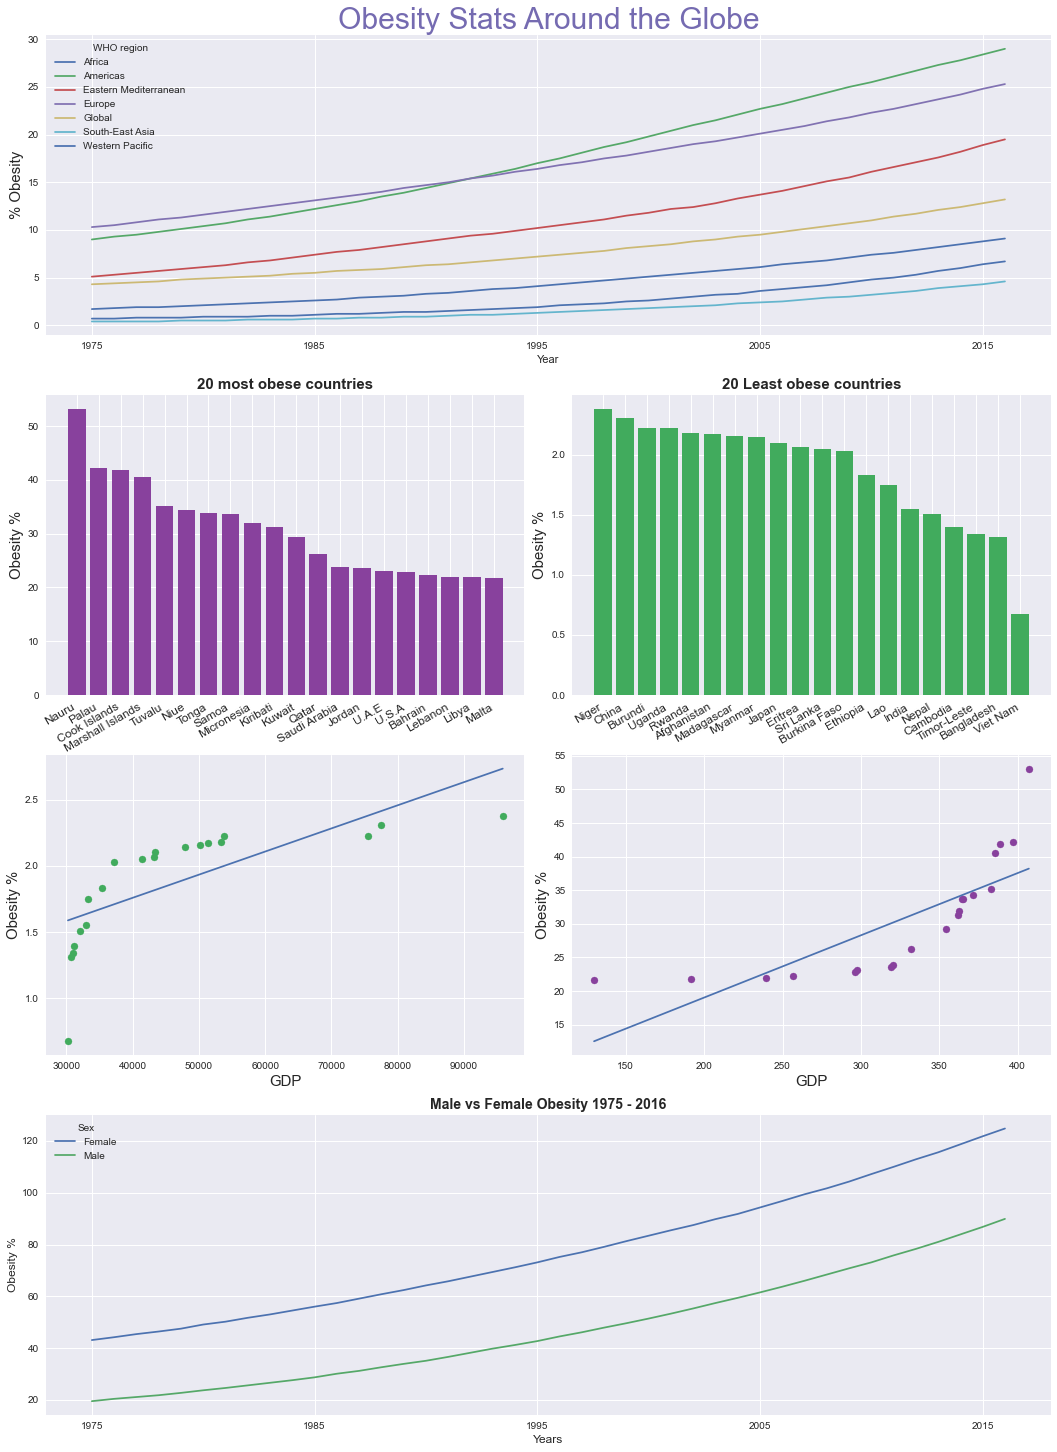

In [40]:
figure = plt.figure(figsize = (18, 32))

grid = plt.GridSpec(5, 2, wspace = 0.1, hspace = 0.2)

g1 = plt.subplot(grid[1, :])
g2 = plt.subplot(grid[2, :1])
g3 = plt.subplot(grid[2, 1])
g4 = plt.subplot(grid[3, :1])
g5 = plt.subplot(grid[3, 1])
g6 = plt.subplot(grid[4, :])

# First layer: Obesity in regions
obesity_region_both = obesity_region_both.groupby(['Year','WHO region'])['Obesity %'].sum().unstack(-1)
obesity_region_both = obesity_region_both.astype(float)
obesity_region_both.plot(kind ='line', ax = g1)
g1.set_title("Obesity Stats Around the Globe", fontsize = 30, color = "#756bb1")
g1.set_ylabel('% Obesity', size = 15)

# Second layer: Bar chart of most and least obese countries

# 20 most obese:
g2.bar(x = countries_high, height = values_high, color = '#88419d')
g2.set_title('20 most obese countries', weight = 'bold', size = 15)
g2.set_ylabel('Obesity %', size = 15)
plt.setp(g2.get_xticklabels(), rotation = 30, horizontalalignment = 'right', size = 12)


# 20 least obese:
g3.bar(x = countries_low, height = values_low, color = '#41ab5d')
g3.set_title('20 Least obese countries', weight = 'bold', size = 15)
g3.set_ylabel('Obesity %', size = 15)
plt.setp(g3.get_xticklabels(), rotation = 30, horizontalalignment='right', size = 12)


# Third layer: Scatter 1 and 2 
# Assigning these lists into numpy arrays in order to do a scatter plot.

x1_array = np.array(values_gdp_high)
y1_array = np.array(values_low)
x2_array = np.array(values_gdp_low)
y2_array = np.array(values_high)

g4.scatter(x1_array, y1_array, color = '#41ab5d')
g4.plot(np.unique(x1_array), np.poly1d(np.polyfit(x1_array, y1_array, 1))(np.unique(x1_array)))
g4.set_xlabel('GDP', size = 15)
g4.set_ylabel('Obesity %', size = 15)

g5.scatter(x2_array, y2_array, color = '#88419d')
g5.plot(np.unique(x2_array), np.poly1d(np.polyfit(x2_array, y2_array, 1))(np.unique(x2_array)))
g5.set_xlabel('GDP', size = 15)
g5.set_ylabel('Obesity %', size = 15)

# Layer 5: difference between genders globally

obesity_region_gendered.plot(kind = 'line', ax = g6)
g6.set_title('Male vs Female Obesity 1975 - 2016', weight = 'bold', size = 14)
g6.set_ylabel('Obesity %', size = 12)
g6.set_xlabel('Years', size = 12)

#figure.savefig('infographics.pdf', bbox_inches='tight') 